### Making plots of gene expression from RNAseq DeSEQ2 csv files

In [230]:
import numpy as np
import pandas as pd
import math
import IPython
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


import importlib
import svgwrite

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

In [320]:
def findgene(genename):
    !head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
# EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
    return gdf

def formatBars(plotH):
    bars = plotH.get_children()
    for i in range(0,len(bars)):
        if i < 4:
            bars[i].set_facecolor('#B400FF')
        else:
            bars[i].set_facecolor('#3232FF')

def formatFigure_Opsins(genename, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    # ax.set_xticks(n)
    # ax.set_xticklabels(gdf.iloc[0,h_start:h_end].index);
    ax.set_xticks([2.5,7])
    ax.set_xticklabels(['UV','S']);
    
    ax.set_yticks(np.arange(0, 2.5, step=0.5))
    # ax.set_yticklabels([str(i) + ' x 10$^6$' for i in np.arange(0, 2.5, step=0.5)]);
    ax.set_ylabel('norm. counts x 10$^6$', fontproperties=fontLabels)
    
    ax.set_title(genename, fontproperties=fontTitle)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    
    formatBars(plotH)

def formatFigure(genename, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    # ax.set_xticks(n)
    # ax.set_xticklabels(gdf.iloc[0,h_start:h_end].index);
    ax.set_xticks([2.5,7])
    ax.set_xticklabels(['UV','S']);
    
#     ax.set_yticks(np.arange(0, 2.5, step=0.5))
    # ax.set_yticklabels([str(i) + ' x 10$^6$' for i in np.arange(0, 2.5, step=0.5)]);
    ax.set_ylabel('norm. counts', fontproperties=fontLabels)
    
    ax.set_title(genename, fontproperties=fontTitle)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    
    formatBars(plotH)

def plotBars(genename):
    gdf = findgene(genename)
    n = np.arange(1,5)
    n = np.append(n, 4.5 + np.arange(1,5))
    h_start = 7
    h_end = 15
    h = gdf.iloc[0,h_start:h_end]
    return n, h

### Good example for opsins with nice format

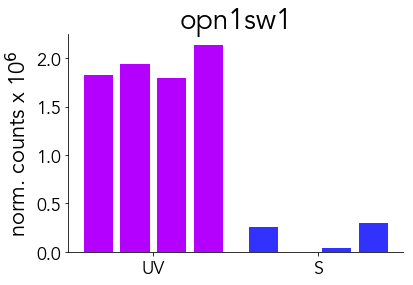

In [321]:
genename = 'opn1sw1'
n,h = plotBars(genename)
h = h / 1e6
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None)
formatFigure_Opsins(genename, fH, ax, pH)
plt.savefig("test.svg", transparent=True, format="svg")

### Generic one (automatic y labels)

In [332]:
!head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
# EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
!grep ^cpne ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,UV01,UV02,UV03,UV04,S01,S02,S03,S04,chr-rank
0,cpne1,copine I,361.69,-0.0009,0.9584,0.977980,0.999194,0,1323,0,85,0,4,1245,237,18440
1,cpne2,copine II,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,18439
2,cpne3,copine III,29.55,-0.1462,0.9449,0.694462,0.999194,0,0,44,39,46,0,57,51,18438
3,cpne4a,copine IVa,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,4049
4,cpne4b,copine IVb,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,4050
5,cpne5a,copine Va,0.17,0.1712,1.0216,0.790718,NaN,0,1,0,0,0,0,0,0,21905
6,cpne5b,copine Vb,0.49,0.2420,1.0481,0.451267,NaN,0,0,0,4,0,0,0,0,21904
7,cpne7,copine VII,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,18441
8,cpne8,copine VIII,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,18437
9,cpne9,copine family member IX,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,18436


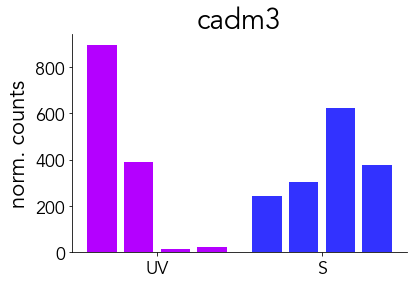

In [334]:
genename = 'cadm3'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None)
formatFigure(genename, fH, ax, pH)
plt.savefig("test.svg", transparent=True, format="svg")

In [226]:
[str(i) + ' x 10$^6$' for i in np.arange(0.5, 2.5, step=0.5)]

['0.5 x 10$^6$', '1.0 x 10$^6$', '1.5 x 10$^6$', '2.0 x 10$^6$']

### These are good, fast and efficient, but make difficult integrating different plots. 
>Will use this to automatically make bar plots of a single gene in matplotlib but it would be nice to just load entire data frame in pandas and use something that integrates all plots.

>In ideal case, this would be an interactive plot where you can look at matching genes across scpecies and highlight gene in volcano plot

This requires a search box which will the diffcult part.
Maybe bokeh could be used for intearctivity but exporting to an svg intaglio can manage is not happening

In [65]:
names = !head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv
gene = !grep opn1sw1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv
type(gene)
# pd.DataFrame(data=data[0],columns=names[0])
gdf=pd.DataFrame(data=gene)[0].str.split(',',expand=True)
ndf=pd.DataFrame(data=names)[0].str.split(',',expand=True) 
gdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,opn1sw1,"""opsin 1 (cone pigments)","short-wave-sensitive 1""",1036242.01,2.4592,1.8458,0.00937694909436462,0.153527057793558,1831890,1940418,1791047,2139963,253221,1152,39185,293059,21622


In [81]:
!head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
# EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
!grep -w ^rho ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,UV01,UV02,UV03,UV04,S01,S02,S03,S04,chr-rank
0,rho,rhodopsin,207561.67,-0.0154,0.7499,0.976022,0.999194,395257,106284,66731,252358,367166,93345,272102,107250,9938


### Maybe using awk, match could be forced to first column

In [71]:
# This is not working
# gene = !awk -F@ "{if (\$2 ~ /$opn1sw1/ ) { print \$0; } }" <~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv>
gene = !grep ^.*@.*opn1sw1.*$ ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.txt
gene

['grep: /Users/angueyra/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.txt: No such file or directory']

### According to Neuhauss recoverin1a in enriched in rods and UV-cones